### Introduction to Confidence Intervals

#### Theoretical Background:
In this lesson we will explore and make you familiar with **Confidence intervals**.

<br>

Confidence intervals are a range of values, derived from sample data, that are used to estimate the value of an unknown population parameter. Unlike a single point estimate, a confidence interval provides an interval estimate that conveys <b>the degree of uncertainty associated with the parameter estimate</b>. The most common confidence level for intervals is 95%, but other levels (such as 90% or 99%) can also be used depending on the context.

The width of the confidence interval gives us an idea of how precise our estimate is. Narrower intervals represent more precise estimates. The confidence level tells us how confident we can be that the interval includes the true parameter value. For example, a 95% confidence interval means that if we were to take 100 different samples and compute a 95% confidence interval for each sample, we would expect about 95 of those intervals to contain the population parameter.

![](https://github.com/IranelGV/Ironhack_IDGV/blob/main/Confidential_Intervals/Confidential_Intervals.jpeg?raw=true)



A basic formula for constructing a confidence interval for a population mean, when the population standard deviation is known, is given by:

$$
\text{Confidence Interval} = \bar{x} \pm Z \cdot \left( \frac{\sigma}{\sqrt{n}} \right)
$$


where:
- $\bar{x}$ is the sample mean,
- $z$ is the Z-score associated with the desired confidence level. Put simply, a Z-score is a way of measuring how many standard deviations an element is from the mean,
- $\sigma$ is the population standard deviation, and
- $n$ is the sample size.
- $\frac{\sigma}{\sqrt{n}}$ is known as the standard error of the mean. It tells us on average, how big of a mistake we will make when trying to estimate the population mean with the average of a sample

So essentially, the “confidence level” is how sure we are that the range we created includes the **true value of the parameter**. In the case of a 95% confidence interval, say for the mean weight of squirrels, as 1.1kg to 1.3kg, we're saying we're 95% confident that the true mean weight of all squirrels lies somewhere between 1.1 and 1.3 kilograms.

When the population standard deviation is unknown and the sample size is small, the t-distribution is used instead of the normal distribution, and the sample standard deviation is used in place of the population standard deviation.

### Practical example

Now let's create a Python example that calculates a 95% confidence interval for the average weight of a sample of apples. Assume we have weighed a sample of apples from a large orchard, and we want to estimate the average weight of apples in the entire orchard based on our sample.

Sample Data:
Suppose we have a sample of 50 apples.
The average (mean) weight of the apples in our sample is 180 grams.
The standard deviation of the weights in our sample is 20 grams.
Objective:
Calculate the 95% confidence interval for the average weight of apples in the orchard.

**In simpler terms, we want to create an interval that will include, with a 95% confidence level, the true mean weight of the apples in the whole orchard!**

**In the cell below, the code is ready for you to run:**

In [6]:
#Import libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Here are our sample statistics
sample_mean = 180  # The mean weight of the sampled apples in grams
sample_std_dev = 20  # The standard deviation of the sample in grams
sample_size = 50 # The sample size
confidence_level = 0.95 # Our 95% confidence level

# We calculate the standard error of the mean
standard_error = sample_std_dev / np.sqrt(sample_size)

# We calculate the margin of error using the t-distribution
# Since the population standard deviation is unknown, we use the t-distribution
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=sample_size-1)  # t-critical value for 95% confidence

margin_of_error = t_critical * standard_error

# Given our sample mean and margin of error, we calculate the confidence interval!
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"The 95% confidence interval for the average weight of apples in the orchard is: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f} grams")


The 95% confidence interval for the average weight of apples in the orchard is: 174.32 to 185.68 grams


In [7]:
# we can abstract the math by using the following function in python

# Compute the confidence interval directly
confidence_interval = stats.t.interval(
    confidence_level,
    df=sample_size-1,
    loc=sample_mean,
    scale=sample_std_dev / np.sqrt(sample_size) # standard error
)
confidence_interval

(np.float64(174.3160628900854), np.float64(185.6839371099146))

In [8]:
# If we considered a normal distribution instead of t-distribution
confidence_interval = stats.norm.interval(
    confidence_level,
    loc=sample_mean,
    scale=sample_std_dev / np.sqrt(sample_size) # standard error
)
confidence_interval

(np.float64(174.4563847026013), np.float64(185.5436152973987))

## Sample Distribution VS Sampling Distribution

Attention to the difference between the **distribution of the sample** and the **sampling distribution** (distribution of the means of many samples).

Why is this important? **Central Limit Theorem applies only to sampling distributions** - the means of the samples follow a normal distribution.

To be able to exemplify the difference, let's pretend that the mean of weights from the **population** (all apples from the orchard) was 180 grams and the standard deviation was 20 grams.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Simulate a sample of 50 apple weights (normally distributed for simplicity - maybe t-distribution would have been more accurate)
pop_mean = 180
pop_std = 20
sample_data = np.random.normal(loc=pop_mean, scale=pop_std, size=50)

# Sample statistics
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)
sample_size = len(sample_data)
standard_error = sample_std / np.sqrt(sample_size)

print("The new sample mean is:", sample_mean)

# Sampling distribution curve (normal approximation)
x = np.linspace(pop_mean - 4*standard_error, pop_mean + 4*standard_error, 5000)
y = stats.norm.pdf(x, loc=pop_mean, scale=standard_error)

The new sample mean is: 185.0291427686142


Notice that the main difference between **generating the distribution for the sample** from **generating the sampling distribution** is using the *standard error* for the **scale** parameter (for sampling distribution) instead of *standard deviation* (for sample distribution).

The ***standard deviation*** measures the spread of the data around the mean in the sample distribution.

The ***standard error*** measures the spread of the **means of the samples** in the sampling distribution.


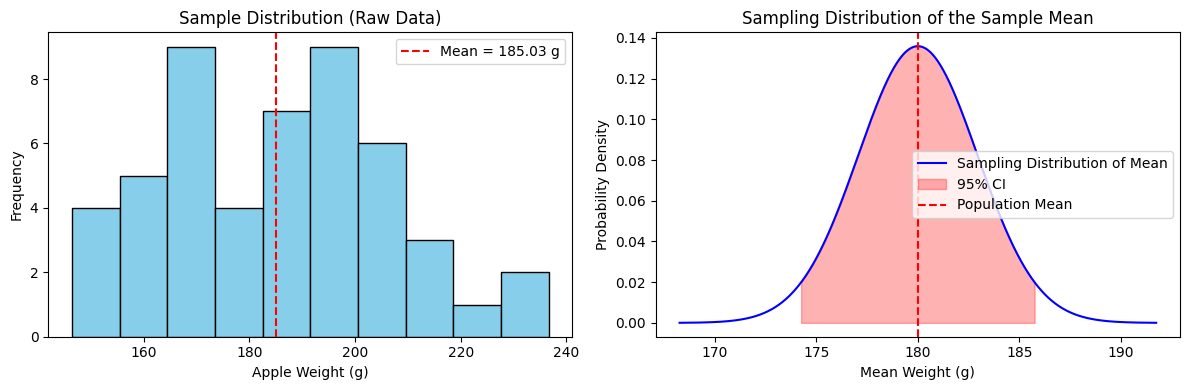

In [28]:
# Plot both
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Histogram of the actual sample data
axs[0].hist(sample_data, bins=10, color='skyblue', edgecolor='black')
axs[0].axvline(sample_mean, color='red', linestyle='--', label=f'Mean = {sample_mean:.2f} g')
axs[0].set_title('Sample Distribution (Raw Data)')
axs[0].set_xlabel('Apple Weight (g)')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot 2: Sampling distribution of the mean
axs[1].plot(x, y, color='blue', label='Sampling Distribution of Mean')
axs[1].fill_between(x, y, where=(x >= pop_mean - 1.96 * standard_error) & (x <= pop_mean + 1.96 * standard_error),
                    color='red', alpha=0.3, label='95% CI')
axs[1].axvline(pop_mean, color='red', linestyle='--', label='Population Mean')
axs[1].set_title('Sampling Distribution of the Sample Mean')
axs[1].set_xlabel('Mean Weight (g)')
axs[1].set_ylabel('Probability Density')
axs[1].legend()

plt.tight_layout()
plt.show()

**In the graph above on the right side:** If we look at the sampling distribution (distribution of the mean of apple weights for many samples), we can see the confidence interval, which illustrates the range in which most of the sample averages are going to be in.

**In the graph bellow:**
If we compare the sample distribution (distribution of our actual sample = weights from the 50 apples we picked), and compare it with the mean confidence interval of the weights, we can see that the confidence interval of the mean is **not a range of apple weights**, but a range of sampling means.

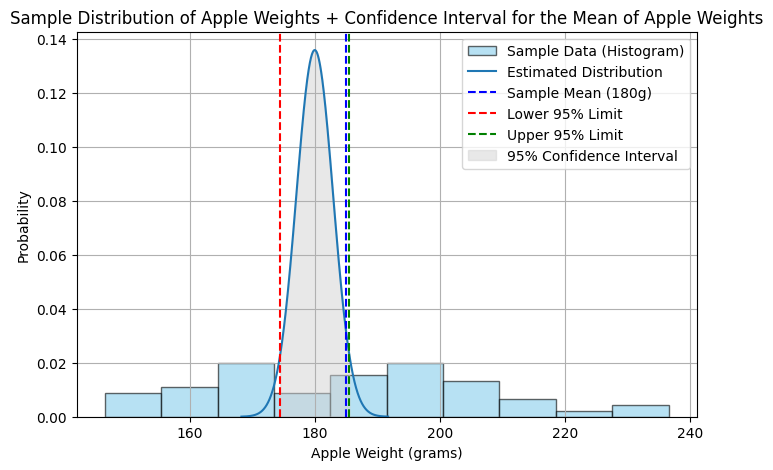

In [29]:
# Plotting
plt.figure(figsize=(8, 5))
plt.hist(sample_data, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6, label='Sample Data (Histogram)')

plt.plot(x, y, label='Estimated Distribution')
#plt.hist(sample_data, bins=10, color='skyblue', edgecolor='black')
plt.axvline(sample_mean, color='blue', linestyle='--', label='Sample Mean (180g)')
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Lower 95% Limit')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label='Upper 95% Limit')

# Shade the confidence interval
plt.fill_between(x, y, where=(x >= confidence_interval[0]) & (x <= confidence_interval[1]),
                 color='lightgrey', alpha=0.5, label='95% Confidence Interval')

plt.title('Sample Distribution of Apple Weights + Confidence Interval for the Mean of Apple Weights')
plt.xlabel('Apple Weight (grams)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

From the plot above we see that the mean of the sample (blue line) is going to be between the lower and upper limits (red line and green line). However, since the sample is being randomly generated with *np.random.normal*, sometimes it might fall before or after the limits. You can run the the code multiple times to check the variation, it is expected that in 95% of the times, the mean will be between the limits.

### Illustrating the T-Distribution and T-Critical value

More about t-distributions [here](https://chatgpt.com/share/68233845-9fb0-8010-b520-694e5ed75f82).

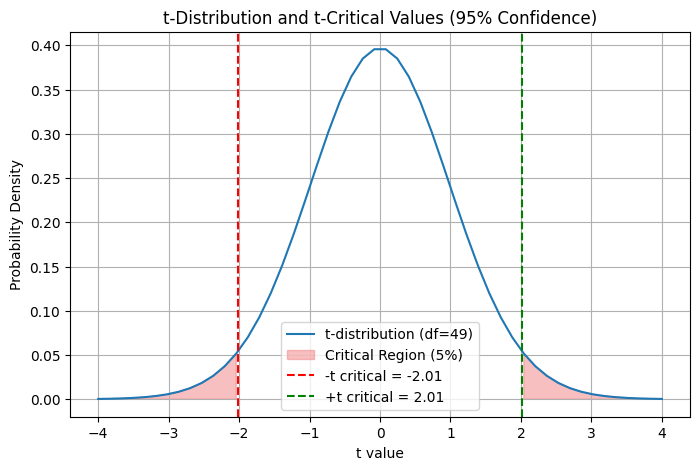

In [ ]:
# Generate x values (t values)
xt = np.linspace(-4, 4, sample_size)
yt = stats.t.pdf(xt, sample_size-1)

plt.figure(figsize=(8, 5))
plt.plot(xt, yt, label=f't-distribution (df={sample_size-1})')

# Shade the critical regions
plt.fill_between(xt, yt, where=(xt <= -t_critical) | (xt >= t_critical), color='lightcoral', alpha=0.5, label='Critical Region (5%)')

# Draw lines at t-critical
plt.axvline(-t_critical, color='red', linestyle='--', label=f'-t critical = {-t_critical:.2f}')
plt.axvline(t_critical, color='green', linestyle='--', label=f'+t critical = {t_critical:.2f}')

plt.title('t-Distribution and t-Critical Values (95% Confidence)')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### What this plot shows:
The bell-shaped curve is the t-distribution for your sample size.
* The shaded red areas on both sides are the "critical regions" (the outer 5% — meaning 2.5% on each side).
* The dashed lines at -t_critical and +t_critical show the cutoff points that define your 95% confidence range.
* The middle part (not shaded) is where you’re 95% confident the true average lies.

This plot says:

"If your result falls between the green and red lines, you’re in the safe 95% zone. If it falls outside, it’s in the rare 5% zone."

### Practice
**Great! We managed to create a 95% confidence interval for the mean weight of the apples in the entire orchard, based on one sample of 100 apples!**
**We can say, with 95% of certainty, that it lies somewhere between 174.32 and 185.68 grams!**

**Your turn now! Suppose you are working for Nike, more specifically for their Air Jordan department in Berlin.
Create a 95% confidence interval for the shoe size of Berliners given the sample of 100 Berlin shoe sizes you collected.**

<br>
<b>Here are the statistics from the sample you have</b>:

<br>
sample_mean = 41
<br>
sample_std_dev = 3
<br>
sample_size = 100
<br>
confidence_level = 0.95

**Feel free to use the code provided in the example above, you will just have to tweak the sample statistics**

In [ ]:
#Your code goes here

sample_mean = 41
sample_std_dev = 3
sample_size = 100
confidence_level = 0.95

confidence_interval = stats.t.interval(
    confidence_level,
    df=sample_size-1,
    loc=sample_mean,
    scale=sample_std_dev / np.sqrt(sample_size) # standard error
)
confidence_interval

(np.float64(40.4047349145474), np.float64(41.5952650854526))

Here are some useful links to understand confidence intervals better:
    <br> - https://www.investopedia.com/terms/c/confidenceinterval.asp
    <br> - https://www.youtube.com/watch?v=TqOeMYtOc1w